## Challenge - Time Series Analysis
1. Plot the time series, along with any logical or necessary differences to get a stationary dataset
2. Generate and interpret a PACF for the time series (and/or its differences)
3. Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data
4. Choose one specification and make the case for that as a logical model for your dataset

In [28]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
eth_price_raw = pd.read_csv('ethereum_price.csv')
eth_price_raw.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",943.57,965.26,892.95,895.37,"2,545,260,000","92,206,500,000"
1,"Feb 19, 2018",921.67,957.78,921.55,943.87,"2,169,020,000","90,047,700,000"
2,"Feb 18, 2018",973.35,982.93,915.45,923.92,"2,567,290,000","95,077,100,000"
3,"Feb 17, 2018",944.75,976.60,940.75,974.12,"2,525,720,000","92,264,000,000"
4,"Feb 16, 2018",934.79,950.00,917.85,944.21,"2,369,450,000","91,272,100,000"


In [3]:
eth_price_raw.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
924,"Aug 11, 2015",0.708087,1.130000,0.663235,1.070000,"1,463,100","42,796,500"
925,"Aug 10, 2015",0.713989,0.729854,0.636546,0.708448,"405,283","43,130,000"
926,"Aug 09, 2015",0.706136,0.879810,0.629191,0.701897,"532,170","42,637,600"
927,"Aug 08, 2015",2.790000,2.800000,0.714725,0.753325,"674,188","167,911,000"
928,"Aug 07, 2015",2.830000,3.540000,2.520000,2.770000,"164,329",-


In [4]:
eth_price_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 7 columns):
Date          929 non-null object
Open          929 non-null float64
High          929 non-null float64
Low           929 non-null float64
Close         929 non-null float64
Volume        929 non-null object
Market Cap    929 non-null object
dtypes: float64(4), object(3)
memory usage: 50.9+ KB


In [5]:
# set df to manipulate
eth_price = eth_price_raw[['Date', 'Close']].copy()

# convert date to datetime
eth_price['Date'] = pd.to_datetime(eth_price['Date'], format='%b %d, %Y')
eth_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 2 columns):
Date     929 non-null datetime64[ns]
Close    929 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.6 KB


In [6]:
print(eth_price.head())
print('number of nulls: {}'.format(eth_price.isnull().any().sum()))

        Date   Close
0 2018-02-20  895.37
1 2018-02-19  943.87
2 2018-02-18  923.92
3 2018-02-17  974.12
4 2018-02-16  944.21
number of nulls: 0


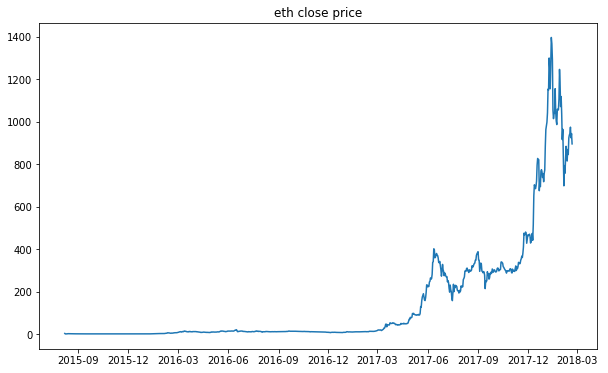

In [7]:
plt.figure(figsize=(10,6))
plt.plot(eth_price['Date'], eth_price['Close'])
plt.title('eth close price')
plt.show()

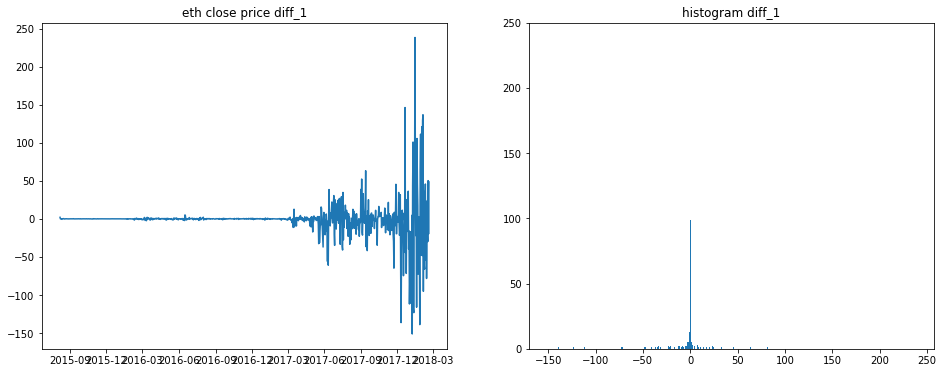

adf: -5.452774224086341
pval: 2.6218254367199483e-06
critical vals {'1%': -3.4375883271133243, '5%': -2.8647353885968214, '10%': -2.568471435365895}


In [53]:
eth_price['diff_1'] = eth_price.Close - eth_price.Close.shift()

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(eth_price['Date'], eth_price['diff_1'])
plt.title('eth close price diff_1')

plt.subplot(122)
plt.hist(eth_price['diff_1'][1:], bins='auto')
plt.title('histogram diff_1')
plt.show()

from statsmodels.tsa.stattools import adfuller
print('adf: {0}\npval: {1}\ncritical vals {2}'.format(
    adfuller(eth_price['diff_1'][1:])[0],
    adfuller(eth_price['diff_1'][1:])[1],
    adfuller(eth_price['diff_1'][1:])[4]))

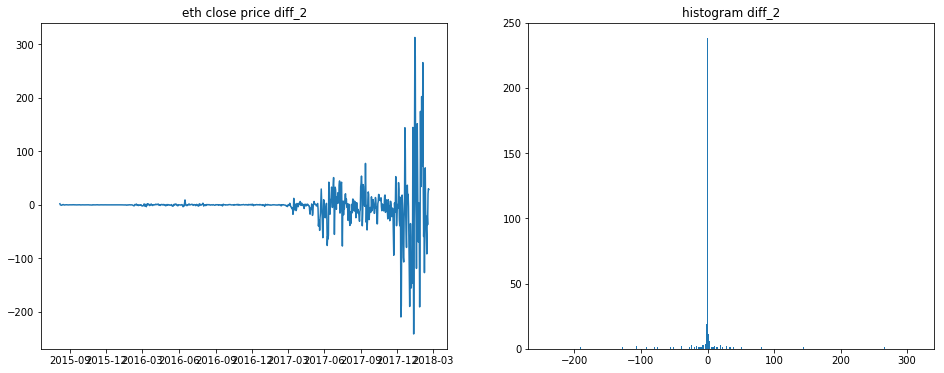

adf: -6.71551924348978
pval: 3.590340176790077e-09
critical vals {'1%': -3.437596348122793, '5%': -2.86473892523805, '10%': -2.5684733191905007}


In [54]:
eth_price['diff_2'] = eth_price.Close - eth_price.Close.shift(2)

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(eth_price['Date'], eth_price['diff_2'])
plt.title('eth close price diff_2')

plt.subplot(122)
plt.hist(eth_price['diff_2'][2:], bins='auto')
plt.title('histogram diff_2')
plt.show()

print('adf: {0}\npval: {1}\ncritical vals {2}'.format(
    adfuller(eth_price['diff_2'][2:])[0],
    adfuller(eth_price['diff_2'][2:])[1],
    adfuller(eth_price['diff_2'][2:])[4]))

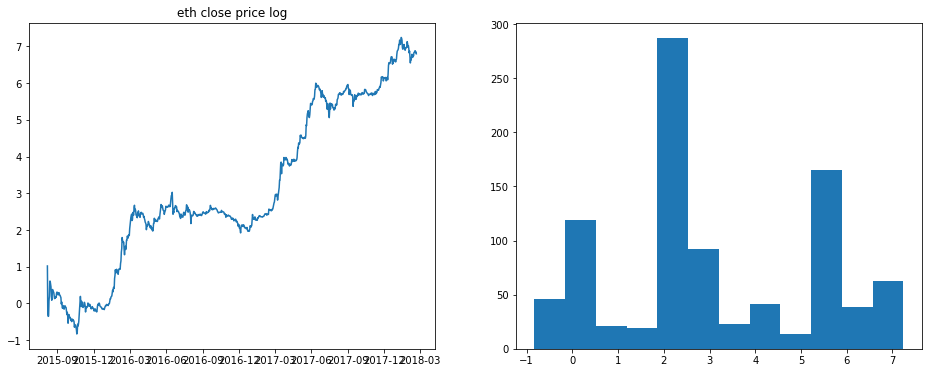

adf: -1.6562658608236194
pval: 0.45377467631198
critical vals {'1%': -3.4375643702748078, '5%': -2.8647248254388096, '10%': -2.568465808810804}


In [55]:
eth_price['log'] = np.log(eth_price['Close'])

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(eth_price['Date'], eth_price['log'])
plt.title('eth close price log')

plt.subplot(122)
plt.hist(eth_price['log'], bins='auto')
plt.show()

print('adf: {0}\npval: {1}\ncritical vals {2}'.format(
    adfuller(eth_price['log'])[0],
    adfuller(eth_price['log'])[1],
    adfuller(eth_price['log'])[4]))

In [88]:
eth_price.head()

,Date,Close,diff_1,diff_2,log,log_diff_1,log_diff_2,sqrt,log_return
0,2018-02-20,895.37,NaN,NaN,6.797237,NaN,NaN,29.922734,NaN
1,2018-02-19,943.87,48.50,NaN,6.849988,3.901973,NaN,30.722467,0.052751
2,2018-02-18,923.92,-19.95,28.55,6.828625,NaN,3.351657,30.396052,-0.021363
3,2018-02-17,974.12,50.20,30.25,6.881534,3.935740,3.409496,31.210896,0.052909
4,2018-02-16,944.21,-29.91,20.29,6.850349,NaN,3.010128,30.728000,-0.031186


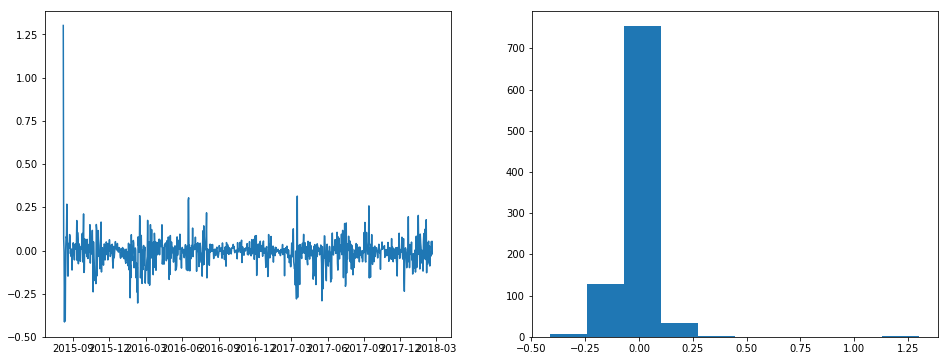

adf: -4.868501344872087
pval: 4.014704286082014e-05
critical vals {'1%': -3.4375643702748078, '5%': -2.8647248254388096, '10%': -2.568465808810804}


In [90]:
eth_price['log_return'] = (np.log(eth_price.Close) 
                           - np.log(eth_price.Close.shift(1)))

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(eth_price['Date'], eth_price['log_return'])

plt.subplot(122)
plt.hist(eth_price['log_return'][1:])
plt.show()

print('adf: {0}\npval: {1}\ncritical vals {2}'.format(
    adfuller(eth_price['log_return'][1:])[0],
    adfuller(eth_price['log_return'][1:])[1],
    adfuller(eth_price['log_return'][1:])[4]))

In [91]:
# try splitting the time series around 2017-05
# which is where price movement begins to take off

eth_price2 = eth_price_raw[['Date', 'Close']].copy()
eth_price2['Date'] = pd.to_datetime(eth_price2['Date'], format='%b %d, %Y')
eth_price2 = eth_price2.loc[eth_price2['Date'] >= '2017-05-01']

print(eth_price.shape)
print(eth_price2.shape)

(929, 9)
(296, 2)


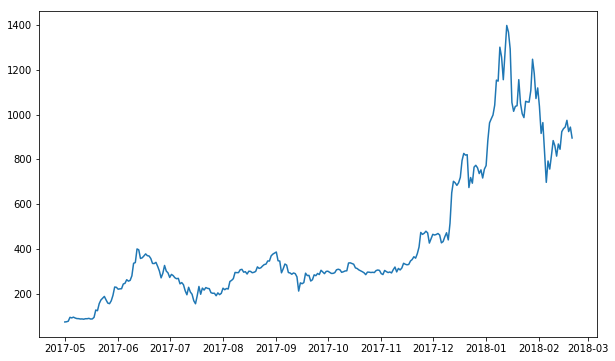

In [92]:
plt.figure(figsize=(10,6))
plt.plot(eth_price2['Date'], eth_price2['Close'])
plt.show()

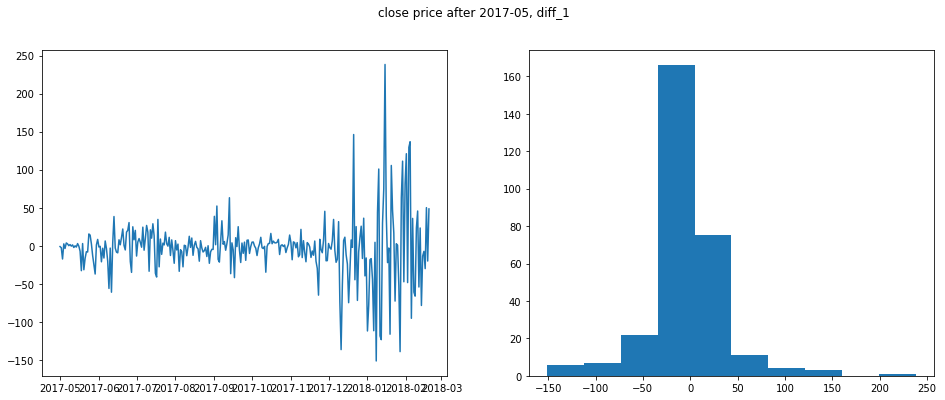

adf: -4.699528613238304
pval: 8.43245297234833e-05
critical vals {'1%': -3.453922368485787, '5%': -2.871918329081633, '10%': -2.5723001147959184}


In [93]:
eth_price2['diff_1'] = eth_price2.Close - eth_price2.Close.shift()

plt.figure(figsize=(16,6))
plt.suptitle('close price after 2017-05, diff_1')

plt.subplot(121)
plt.plot(eth_price2['Date'], eth_price2['diff_1'])

plt.subplot(122)
plt.hist(eth_price2['diff_1'][1:])

plt.show()

print('adf: {0}\npval: {1}\ncritical vals {2}'.format(
    adfuller(eth_price2['diff_1'][1:])[0],
    adfuller(eth_price2['diff_1'][1:])[1],
    adfuller(eth_price2['diff_1'][1:])[4]))

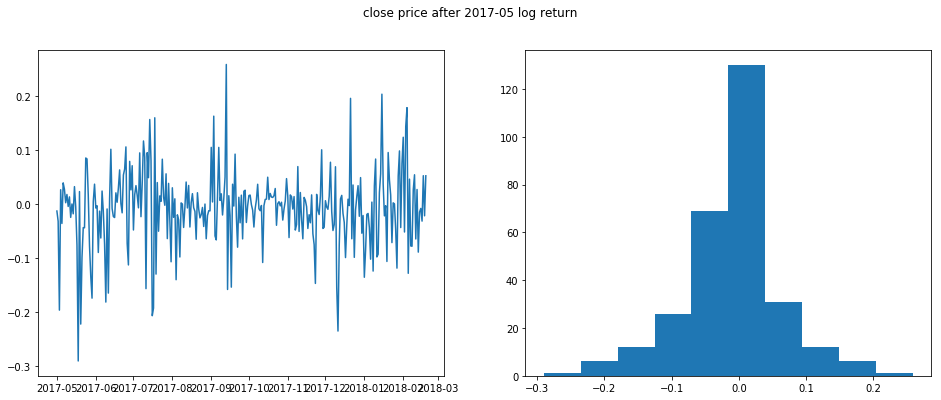

adf: -16.51538606092707
pval: 2.087580734766822e-29
critical vals {'1%': -3.452867117291862, '5%': -2.8714554160827745, '10%': -2.5720532321867466}


In [94]:
eth_price2['log_return'] = (np.log(eth_price2.Close)
                        - np.log(eth_price2.Close.shift(1)))

plt.figure(figsize=(16,6))
plt.suptitle('close price after 2017-05 log return')

plt.subplot(121)
plt.plot(eth_price2['Date'], eth_price2['log_return'])

plt.subplot(122)
plt.hist(eth_price2['log_return'][2:])

plt.show()

print('adf: {0}\npval: {1}\ncritical vals {2}'.format(
    adfuller(eth_price2['log_return'][2:])[0],
    adfuller(eth_price2['log_return'][2:])[1],
    adfuller(eth_price2['log_return'][2:])[4]))

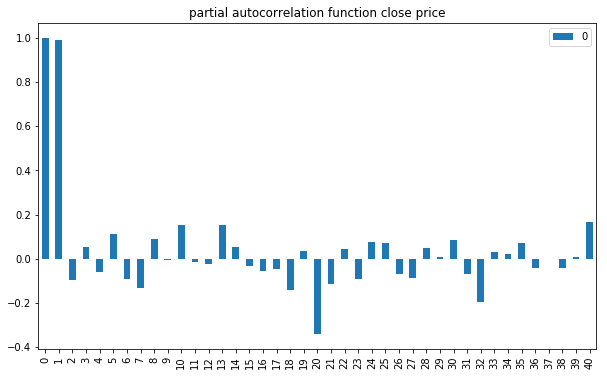

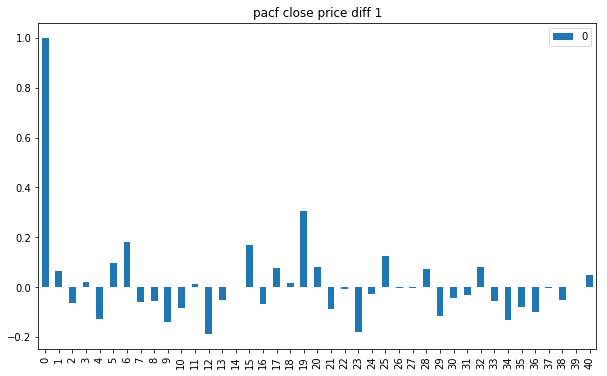

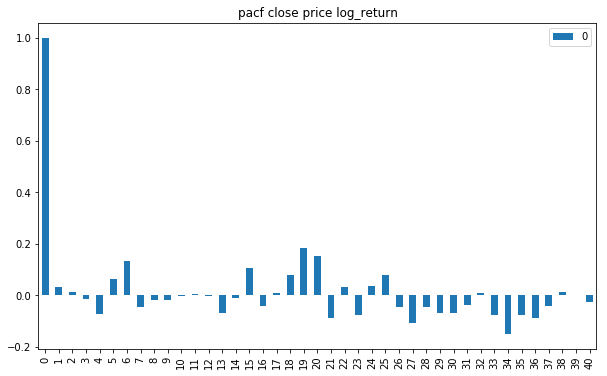

In [106]:
from statsmodels.tsa.stattools import pacf

x_acf = pd.DataFrame(pacf(eth_price2.Close))
x_acf.plot(kind='bar', figsize=(10,6))
plt.title('partial autocorrelation function close price')
plt.show()

x_acf2 = pd.DataFrame(pacf(eth_price2.diff_1[1:]))
x_acf2.plot(kind='bar', figsize=(10,6))
plt.title('pacf close price diff 1')
plt.show()

x_acf3 = pd.DataFrame(pacf(eth_price2.log_return[1:]))
x_acf3.plot(kind='bar', figsize=(10,6))
plt.title('pacf close price log_return')
plt.show()

Strong autocorrelation in initial time series at 1, none in diff_1 or log return